In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import paho.mqtt.client as mqtt
print('Libraries have been imported')

Libraries have been imported


In [9]:
#------------------------------------------------------------------------------------
#Read the data that will be used to simulate data created and transmitted by a device
#------------------------------------------------------------------------------------
device_df = pd.read_csv('device_data.csv')
device_df.head()

,PType_WZ,Date,int_1,int_2,int_3,int_4,int_5,int_6,int_7,int_8,...,int_87,int_88,int_89,int_90,int_91,int_92,int_93,int_94,int_95,int_96
0,BUSHIDG_COAST,1/1/2021,11.419,11.339,11.285,11.235,11.205,11.192,11.153,11.147,...,12.342,12.296,12.205,12.136,12.036,11.915,11.719,11.627,11.536,11.396


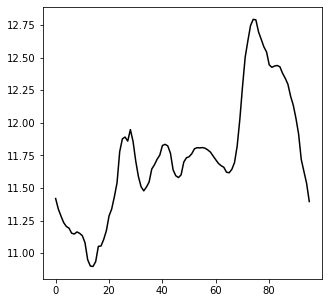

In [10]:
#---------------------------------------
# Plot the data that will be transmitted
#---------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

lst = device_df.drop(['PType_WZ', 'Date'], axis=1).values[0]
x_axis = [x for x in range(len(lst))]
y_axis = lst
_ = ax.plot(x_axis, y_axis, color='black')

In [11]:
#------------------------------------------------------------------------
# Define connection data that must be in the following format
# host = six letter org id + '.messaging.internetofthings.ibmcloud.com'
# clientId = 'd:' + six letter org id + ':' + devicetype + ':' + deviceId
# user = 'use-token-auth'
# pw = custom or generated pw created during device id registration
#------------------------------------------------------------------------
host = 'xxxxxx.messaging.internetofthings.ibmcloud.com'
clientId = 'd:xxxxxx:mydevicetypemp:testdevice01'
user = 'use-token-auth'
pw = 'xxxxxxxxxxxxxxxxxx'

In [12]:
#-------------------------------------------------------
# Connect to the device id so messages can be sent to it
#-------------------------------------------------------
client = mqtt.Client(clientId)
client.username_pw_set(user, pw)
client.connect(host, 1883, 60)

0

In [13]:
# ----------------------------------------------------------------------------------
# Define a topic so messages can be posted on it for a client associated to a device
# 'iot-2 + '/evt/' + topicname + '/fmt/json'
# ----------------------------------------------------------------------------------
topic = 'iot-2/evt/testtopic/fmt/json'
for val in y_axis:
    client.publish(topic, json.dumps(val))

In [14]:
# --------------------------
# Disconnect from the device
# --------------------------
client.loop()
client.disconnect()

0